In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Set dark theme
#plt.style.use('dark_background')
#sns.set_palette(sns.color_palette("Accent"))
# Create an array with the colors you want to use
colors = [  "blueviolet", "deepskyblue","lightyellow", "blueviolet", "slategrey",  "lightpink", "bisque"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.set_style({'axes.grid' : False})

In [4]:
train = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2022/train.csv")

In [5]:
def create_EDA_summary (df = None):
    train_import_table = pd.DataFrame()
    train_import_table["dtype"] = train.apply(lambda x: x.dtype)
    train_import_table["NROW"] = train.shape[0]
    train_import_table["Unique_values"] = [ len(train[col].unique()) for col in train.columns]
    train_import_table["Percent_missing"] = (train.isnull().sum()/train.shape[0])*100
    
    return train_import_table

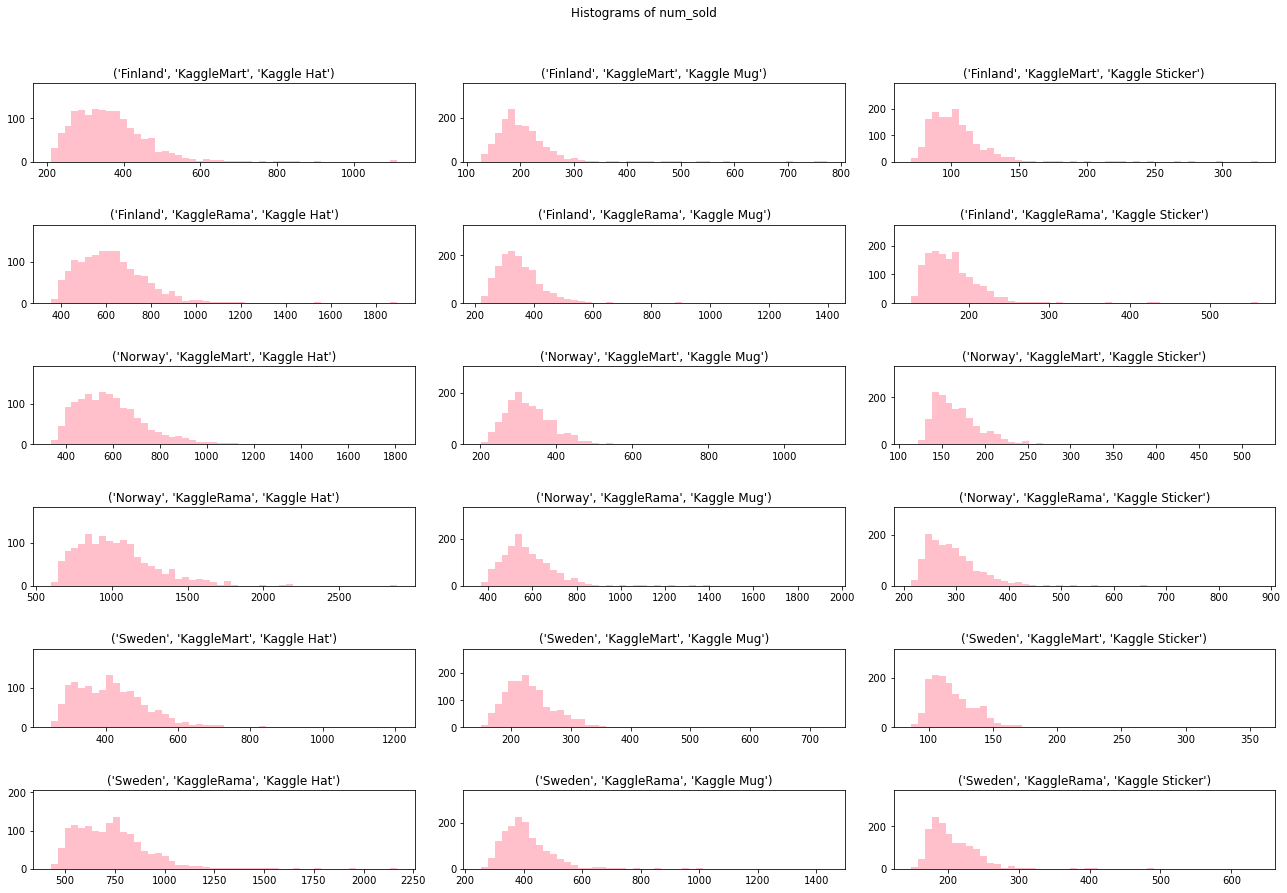

In [6]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(train.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.hist(df.num_sold, bins=50, color='pink')
    #ax.set_xscale('log')
    ax.set_title(combi)
plt.suptitle('Histograms of num_sold', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

### Plotting of Groupings

In [7]:
def plot_groups_hist(df = None, var_list = [], target = None, bins = 50, nrows = 6, ncol = 3):

    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(df.groupby(var_list)):
        ax = plt.subplot(nrows, ncol, i+1, ymargin=0.5)
        ax.hist(df[target], bins=bins)
        #ax.set_xscale('log')
        ax.set_title(combi)
    plt.suptitle('Histograms of {target}', y=1.03)
    plt.tight_layout(h_pad=3.0)
    plt.show()

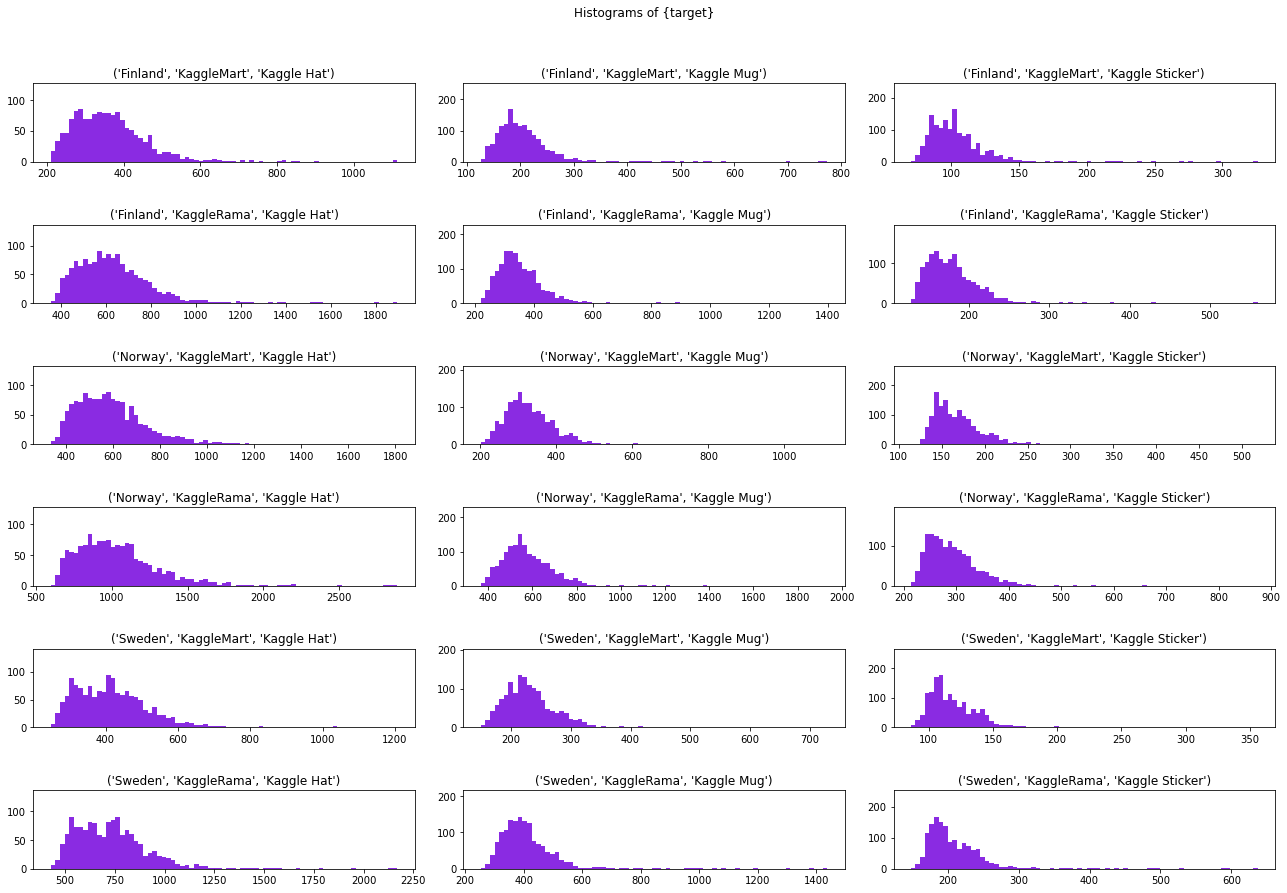

In [8]:
plot_groups_hist(df = train, var_list = ['country', 'store', 'product'], target = "num_sold", bins = 75)

In [9]:
def plot_groups_line(df = None, var_list = [], target = None, nrows = 6, ncol = 3):

    plt.figure(figsize=(18, 12))
    for i, (combi, df) in enumerate(df.groupby(var_list)):
        ax = plt.subplot(6, 3, i+1, ymargin=0.5)
        ax.plot(df[target])
        #ax.set_xscale('log')
        ax.set_title(combi)
    plt.suptitle('Histograms of {target}', y=1.03)
    plt.tight_layout(h_pad=3.0)
    plt.show()

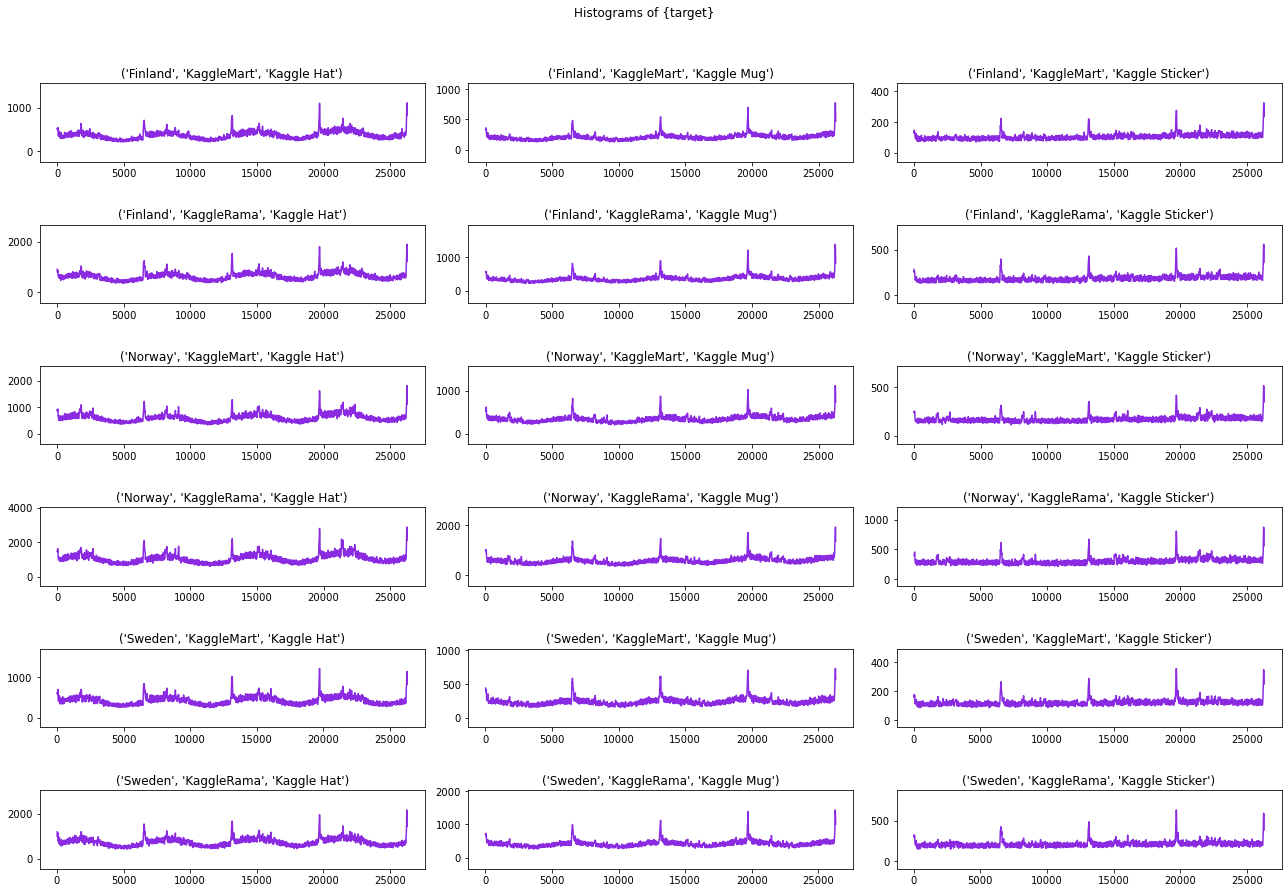

In [10]:
plot_groups_line(df = train, var_list = ['country', 'store', 'product'], target = "num_sold")

In [11]:
def create_features(df = None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    #return df

In [12]:
train["date"] = pd.to_datetime(train["date"])
train = train.set_index("date")

In [13]:
create_features(df = train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [14]:
train.head()

,row_id,country,store,product,num_sold,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,,,
2015-01-01,0,Finland,KaggleMart,Kaggle Mug,329,2015-01-01,0,3,1,1,2015,1,1,1
2015-01-01,1,Finland,KaggleMart,Kaggle Hat,520,2015-01-01,0,3,1,1,2015,1,1,1
2015-01-01,2,Finland,KaggleMart,Kaggle Sticker,146,2015-01-01,0,3,1,1,2015,1,1,1
2015-01-01,3,Finland,KaggleRama,Kaggle Mug,572,2015-01-01,0,3,1,1,2015,1,1,1
2015-01-01,4,Finland,KaggleRama,Kaggle Hat,911,2015-01-01,0,3,1,1,2015,1,1,1
